# Apprentissage supervisé - Regression, DecisionTreeRegressor, RandomForestRegressor

## 1 Préparation des données

### 1.1 Récupération des données et mise en place de l'environnement

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [68]:
df = pd.read_csv("housing.csv", sep=",")

### 1.2 Information sur les données

In [69]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


__About this file__: sur [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices)

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

#### Nombre de lignes et de colonnes des données :

In [70]:
df.shape

(20640, 10)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Type des attributs

In [72]:
numerical = df.select_dtypes(float)
categorial = df.select_dtypes(object)

print("Numerical and Categorial Values :")
print("=====================================")
print("Numerical :")
i = 0
for col in numerical :
        print(col)
        i +=1
print(">>", i, "numerical values in the dataframe")
print("=====================================")
print("Categorial :")
i = 0
for col in categorial :
        print(col)
        i +=1
print(">>", i, "categorial values in the dataframe")
print("=====================================")

Numerical and Categorial Values :
Numerical :
longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
>> 9 numerical values in the dataframe
Categorial :
ocean_proximity
>> 1 categorial values in the dataframe


#### Valeurs Nan

In [73]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [74]:
for col in df :
    if df[col].isnull().sum() :
        print(col, "has", df[col].isnull().sum(), "NaN values")

total_bedrooms has 207 NaN values


#### Répartition des données qualitatives (occurence)

In [75]:
oceanprox_category_values = df.ocean_proximity.unique()

i=0
for val in oceanprox_category_values:
    i+=1
    print(i, val)
print("ocean_proximity has", i, "different values. \nRepartition :")
print(df.ocean_proximity.value_counts())

1 NEAR BAY
2 <1H OCEAN
3 INLAND
4 NEAR OCEAN
5 ISLAND
ocean_proximity has 5 different values. 
Repartition :
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


#### Statistiques du jeu de données

In [76]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


#### Visualisation graphique

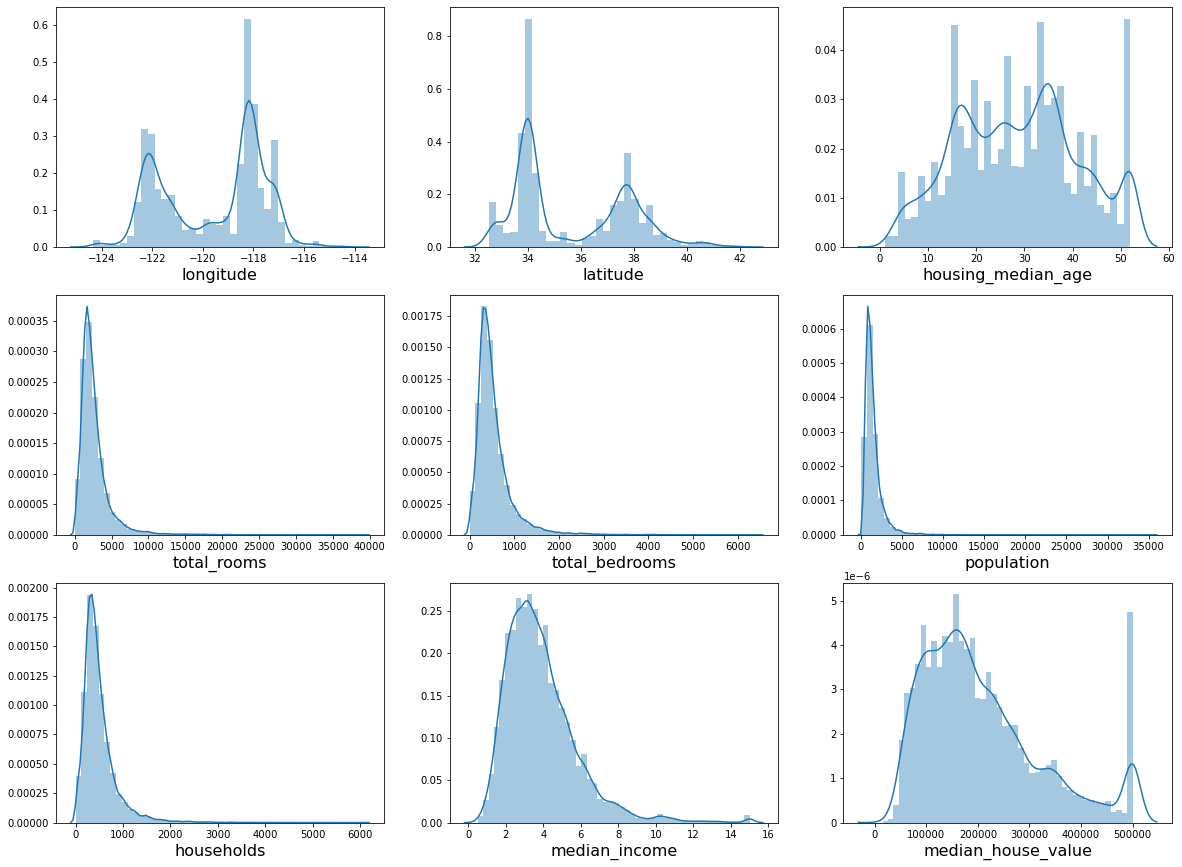

In [77]:
# Histogrammes des données quantitatives

plt.figure(figsize=(20,15))
for col in enumerate(numerical):
    plt.subplot(3,3,col[0]+1)
    ax = sns.distplot(numerical[col[1]])
    ax.set_xlabel(col[1], fontsize=16)
plt.savefig('Histo1.png')
plt.show()

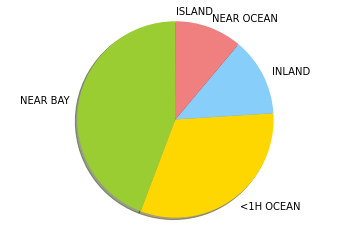

In [78]:
# Diagramme de répartition des données qualitatives
labels = []
sizes = []
for i in range(5) : 
    labels.append(oceanprox_category_values[i])
    sizes.append(df.ocean_proximity.value_counts(normalize=True)[i])
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'teal']

plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChartOceanProx.png')
plt.show()


### 1.3 Répartition des données 

In [79]:
y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)
print("y =", y.shape, "-- X =", X.shape)

y = (20640,) -- X = (20640, 9)


#### Séparation en données de test et d'entraînement

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Train set shape >> X :", X_train.shape, "  y :", y_train.shape)
print("Test set shape  >> X :", X_test.shape, "   y :", y_test.shape)

Train set shape >> X : (16512, 9)   y : (16512,)
Test set shape  >> X : (4128, 9)    y : (4128,)


In [81]:
X_test.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY


### 1.4 Découverte et visualisation des données

#### Visualisation géographique des données (Latitude, Longitude)

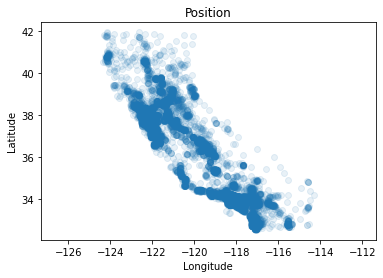

In [249]:
plt.scatter(X_train['longitude'], X_train['latitude'], alpha=0.1)
plt.title('Position')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.savefig('house_localisation0.png')

#### Visualisation du prix moyen des maisons en fonction de la position géographique

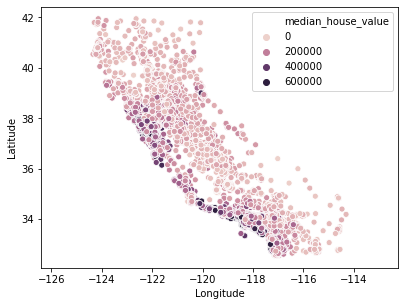

In [244]:
plt.figure(figsize=(6.4, 4.8))
sns.scatterplot(data=X_train, x="longitude", y="latitude", hue=y_train)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.savefig('house_localisation1.png')

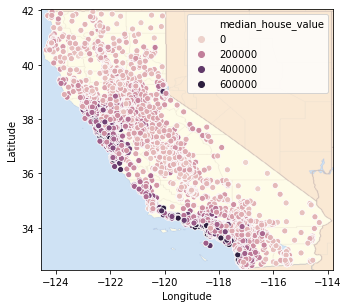

In [246]:
california_map=mpimg.imread('california.png')


plt.figure(figsize=(6.4, 4.8))
sns.scatterplot(data=X_train, x="longitude", y="latitude", hue=y_train)
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('house_localisation2.png')

_On voit clairement sur la carte ci-dessus que le prix des maisons augmente avec la proximité géographique de l'océan et des baies de San-Francisco et Los Angeles._

_Voyons si d'autres facteurs, comme le revenu moyen ou la densité de population, semblent également correler cette répartition._

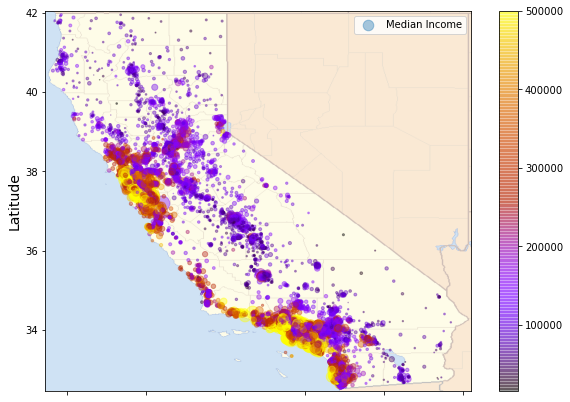

<Figure size 432x288 with 0 Axes>

In [247]:
X_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=X_train['median_income']**2, 
             label='Median Income', figsize=(10, 7), c=y_train, cmap=plt.get_cmap('gnuplot'), colorbar=True)

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()
plt.savefig('house_localisation3.png')

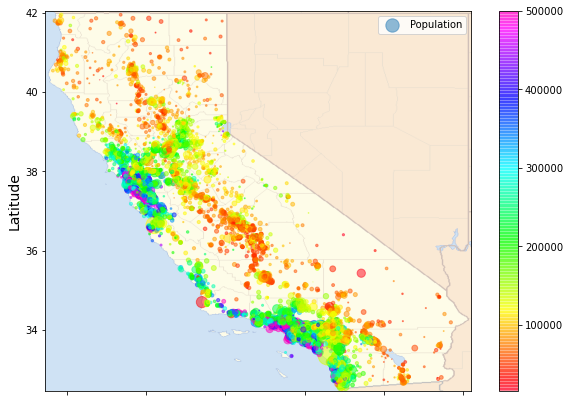

<Figure size 432x288 with 0 Axes>

In [248]:
X_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, s=X_train['population']/100, label='Population', 
           figsize=(10,7), c=y_train, cmap=plt.get_cmap('gist_rainbow'), colorbar=True)

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()
plt.savefig('house_localisation4.png')

_On voit qu'en effet, ces deux features semblent bien évoluer avec le prix moyen de l'immobilier.
la densité de population et le revenu moyen des foyers sont plus élévés là où la valeur des maison est également la plus élevée, c'est à dire à proximité de l'océan et/ou des grandes villes._

### 1.5 Nettoyage des données

#### Séparation features / target

Les données ont déjà été séparées à la question 1.3. On a fait :
```python 
y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
```

En utilisant la fonction `copy` de panda, on obtient une deep-copy de la DataFrame, ce qui nous permet de travailler avec toutes les features tout en évitant de modifier accidentellement le dataframe d'origine.


In [87]:
y = df['median_house_value'].copy()
X = df.drop(['median_house_value'], axis=1).copy()
print("shapes : y =", y.shape, "X =", X.shape)

shapes : y = (20640,) X = (20640, 9)


#### Remplacement des valeurs manquantes

In [88]:
X['total_bedrooms'].fillna(value=X['total_bedrooms'].mean(), inplace=True)

In [89]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

_Les valeurs manquantes on bien été remplacées._

#### Encodage des valeurs qualitatives

In [90]:
encoded_ocean = pd.get_dummies(X['ocean_proximity'])

In [91]:
encoded_ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [92]:
X = pd.concat([X.drop(['ocean_proximity'], axis=1), encoded_ocean], axis=1)
X.shape

(20640, 13)

In [93]:
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,0,0,0,1,0


## 2 Sélection, apprentissage et évaluation du modèle

### 2.1 Régression linéaire

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [125]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
regressor.score(X_train, y_train)

0.6471730344800684

In [127]:
regressor.score(X_test, y_test)

0.6381617983930401

### 2.2 Prédiction

In [128]:
y_pred = regressor.predict(X_test)

In [129]:
y_testarray = y_test.values

In [130]:
y_testarray.reshape(len(y_testarray),1)
y_pred.reshape(len(y_pred),1)
print("|{:^20}|{:^20}|{:^20}|".format("prédiction", "test", "écart"))
for i in range(20):
    print("|{:^20}|{:^20}|{:^20}|".format(round(y_pred[i],1), y_testarray[i], round(y_pred[i] - y_testarray[i])))

|     prédiction     |        test        |       écart        |
|      216580.4      |      136900.0      |      79680.0       |
|      287452.1      |      241300.0      |      46152.0       |
|      179457.6      |      200700.0      |      -21242.0      |
|      86485.4       |      72500.0       |      13985.0       |
|      291756.9      |      460000.0      |     -168243.0      |
|      202748.3      |      120000.0      |      82748.0       |
|      281875.0      |      247000.0      |      34875.0       |
|      315210.0      |      336900.0      |      -21690.0      |
|      307307.1      |      339700.0      |      -32393.0      |
|      241904.0      |      265600.0      |      -23696.0      |
|      238139.2      |      237900.0      |       239.0        |
|      98517.6       |      92200.0       |       6318.0       |
|      77841.1       |      79500.0       |      -1659.0       |
|      166763.8      |      137500.0      |      29264.0       |
|      194483.4      |   

### 2.3 Mesure RMSE du modèle

In [131]:
mean_squared_error(y_test, y_pred, squared = False)

68689.2056170515

_On remarque que les écarts entre les prédictions et les données de test sont grands, et que l'erreur quadratique moyenne est élevée. On va essayer de voir si l'on peut obtenir de meilleurs résultats avec un autre modèle que le modèle linéaire._

### 2.4 Decision Tree Regressor - Prediction et RMSE

In [132]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [133]:
tree.score(X_train, y_train)

1.0

In [134]:
tree.score(X_test, y_test)

0.6244490256082014

__prédiction et RMSE__

In [135]:
y_pred_tree = tree.predict(X_test)

In [136]:
print("RMSE test :", mean_squared_error(y_test, y_pred_tree, squared=False))

RMSE test : 69978.67776167803


In [137]:
y_pred_tree_train = tree.predict(X_train)

In [138]:
print("RMSE train :", mean_squared_error(y_train, y_pred_tree_train, squared=False))

RMSE train : 0.0


### 2.4 Validation par 10-fold Cross-Validation

In [167]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [176]:
scores = cross_val_score(tree, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [62230.30137231 46928.70452456 48401.19896728 52194.05955116
 51316.68838517 63566.70923219 56770.54778741 54417.47252865
 56839.03155333 50743.7738092 ]
Mean: 54340.84877112667
Standard deviation: 5257.591746393702


### 2.5 Comparaison Regression Linéaire / Decision Tree Regressor

In [243]:
print("RMSE DecisionTreeRegression  =", round(mean_squared_error(y_test, y_pred_tree, squared=False)))
print("RMSE LinearRegression        =", round(mean_squared_error(y_test, y_pred, squared=False)))

RMSE DecisionTreeRegression  = 69979.0
RMSE LinearRegression        = 68689.0


_Les RMSE de ces deux modèles de régression sont équivalentes. On ne peut donc pas dire que le Decision Tree Regressor soit un meilleur modèle que le Linear Regressor pour faire des prédictions sur ces données._

## 3 Fine Tuning

### 3.1 Grid Search

#### Random Forest Regressor

In [155]:
regforest = RandomForestRegressor()
regforest.fit(X_train, y_train)
regforest.score(X_train, y_train)

0.9749587453241413

In [156]:
regforest.score(X_test, y_test)

0.8248055831965428

In [162]:
y_pred_forest = regforest.predict(X_test)
y_pred_forest_train = regforest.predict(X_train)
print("RMSE test :", mean_squared_error(y_test, y_pred_forest, squared=False))
print("RMSE train :", mean_squared_error(y_train, y_pred_forest_train, squared=False))

RMSE test : 47795.98504571762
RMSE train : 18306.966322260127


#### Grid Search sur Random Forest Regressor

In [183]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}]
    #  Au total, 4x3=12 combinaisons vont être testées

# recherche sur 5 forlds
grid_search = GridSearchCV(regforest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### Recherche des meilleurs paramètres

In [184]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [233]:
print("nombre d'arbres à créer dans la forêt :",  grid_search.best_params_['n_estimators'])
print("nombre de variables à utiliser à chaque division d’un noeud :",  grid_search.best_params_['max_features'])

nombre d'arbres à créer dans la forêt : 30
nombre de variables à utiliser à chaque division d’un noeud : 6


#### Affichage des résultats des 12 combinaisons avec la fonction Grid-Search

In [201]:
results = grid_search.cv_results_

Le resultat de cette commande est un dictionnaire du type :
```python 
{
'mean_fit_time': array([0.08554978,... 1.86227789]), 
'std_fit_time': array([0.00635239, ... 0.05542857]), 
'mean_score_time': array([0.00659299, ... 0.03457584]), 
'std_score_time': array([0.00049391, ... 0.0004852 ]), 
'param_max_features': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6, 8, 8, 8],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False], fill_value='?', dtype=object), 
'param_n_estimators': masked_array(data=[3, 10, 30, 3, 10, 30, 3, 10, 30, 3, 10, 30],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False], fill_value='?', dtype=object), 
'params': [{'max_features': 2, 'n_estimators': 3}, {'max_features': 2, 'n_estimators': 10}, 
           {'max_features': 2, 'n_estimators': 30}, {'max_features': 4, 'n_estimators': 3}, 
           {'max_features': 4, 'n_estimators': 10}, {'max_features': 4, 'n_estimators': 30}, 
           {'max_features': 6, 'n_estimators': 3}, {'max_features': 6, 'n_estimators': 10}, 
           {'max_features': 6, 'n_estimators': 30}, {'max_features': 8, 'n_estimators': 3}, 
           {'max_features': 8, 'n_estimators': 10}, {'max_features': 8, 'n_estimators': 30}], 
'split0_test_score': array([-4.06915452e+09,... -2.66691867e+09]), 
'split1_test_score':... 
'split4_test_score': array([-4.44209498e+09,... -2.42622417e+09]), 
'mean_test_score': array([-4.14940209e+09, ... -2.52068494e+09]), 
'std_test_score': array([2.31317126e+08, ... 1.46662957e+08]), 
'rank_test_score': array([12,  8,  6, 11,  7,  3, 10,  5,  1,  9,  4,  2]), 
'split0_train_score': array([-1.05341421e+09, ... -3.83151228e+08]), 
'split1_train_score': ...
'split4_train_score': array([-1.16956934e+09, ... -3.79712540e+08]), 
'mean_train_score': array([-1.10061742e+09,... -3.79494803e+08]), 
'std_train_score': array([43972772.88329528,... 4012257.5005569 ])}
```

on peut donc utiliser ces parametres pour afficher les résultats et parametres souhaités :

In [241]:
i=1
print("|{:^9}|{:^12} | {:<40}|".format("essai n°", "RMSE", " nb variables       nb arbres"))
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print("|{:^9}|{:^12} | {:<40}|".format(i, round(np.sqrt(-mean_score)), str(params)))
    i+=1

|essai n° |    RMSE     |  nb variables       nb arbres           |
|    1    |  64416.0    | {'max_features': 2, 'n_estimators': 3}  |
|    2    |  55425.0    | {'max_features': 2, 'n_estimators': 10} |
|    3    |  52577.0    | {'max_features': 2, 'n_estimators': 30} |
|    4    |  60724.0    | {'max_features': 4, 'n_estimators': 3}  |
|    5    |  52925.0    | {'max_features': 4, 'n_estimators': 10} |
|    6    |  50854.0    | {'max_features': 4, 'n_estimators': 30} |
|    7    |  59180.0    | {'max_features': 6, 'n_estimators': 3}  |
|    8    |  52339.0    | {'max_features': 6, 'n_estimators': 10} |
|    9    |  50052.0    | {'max_features': 6, 'n_estimators': 30} |
|   10    |  58803.0    | {'max_features': 8, 'n_estimators': 3}  |
|   11    |  52283.0    | {'max_features': 8, 'n_estimators': 10} |
|   12    |  50206.0    | {'max_features': 8, 'n_estimators': 30} |


### 3.2 Evaluation sur la base de test

In [220]:
best_grid_model = grid_search.best_estimator_

In [222]:
y_pred_grid = best_grid_model.predict(X_test)

In [225]:
print("RMSE =", mean_squared_error(y_test, y_pred_grid, squared = False))

RMSE = 49195.19149082695


In [231]:
print("RMSE GridSearch-RandomForest =", mean_squared_error(y_test, y_pred_grid, squared = False))
print("RMSE DecisionTreeRegression  =", mean_squared_error(y_test, y_pred_tree, squared=False))
print("RMSE LinearRegression        =", mean_squared_error(y_test, y_pred, squared=False))

RMSE GridSearch-RandomForest = 49195.19149082695
RMSE DecisionTreeRegression  = 69978.67776167803
RMSE LinearRegression        = 68689.2056170515


__Le meilleur modèle est donc le dernier qui a été testé, à savoir le Random Forest Regresor, à condition qu'il soit initialisés avec les bons paramètres. L'utilisation de la  méthode d’optimisation *GridSearch* nous a permis d'évaluer différentes associations de paramètres et d'en comparer les performances pour déduire le meilleur paramétrage.__

En effet, lorsque l'on implémente un modèle de Random Forest, on doit choisir le nombre d’arbres à créer et le nombre de variables à utiliser à chaque division d’un noeud. La méthode GridSearch utilise la validation croisée (cross-validation) pour construire autant de modèles que nécessaire et évaluer leur performance les uns par rapport aux autres.

La méthode Grid Search a néanmoins ses limites puisque les paramètres à tester doivent être définis à l'avance et manuellement. De fait, on a déterminé que la performance était meilleure avec 30 arbres qu'avec 3 ou 10. Mais on aurait peut-être un meilleur résultat avec 25 ou 35 arbres...<br>
Par contre un avantages important de cette méthode est que les traitements ne dépendent pas les uns des autres et peuvent être donc parallélisés.